<a href="https://colab.research.google.com/github/jhou27/NLP_with_Python/blob/main/sentiment_analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from string import punctuation
import matplotlib.pyplot as plt


In [2]:
#read IMDB movies reivew dataset
with open('/content/drive/My Drive/coding/IMDB_Dataset.csv', 'r') as f:
 reviews = f.read()

with open('/content/drive/My Drive/coding/labels.csv', 'r') as f:
 labels = f.read()

print(reviews[:50])
print()
print(labels[:26])

review,sentiment
"One of the other reviewers has m

positive
positive
positive


#Data Processing - convert to lower case

In [3]:
reviews = reviews.lower()

#Data Precessing - remove punctuation

In [4]:
print(punctuation)

all_text = ''.join([c for c in reviews if c not in punctuation])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#Data Preprocessing - create list of reviews
all the words are in one huge string. Now separate out individual reviews and store them as individual list elements. Like, [review1, review2, review3.....reviewn]

In [5]:
reviews_split = all_text.split('\n')
print('Number of reviews:',len(reviews_split))

Number of reviews: 50002


#Tokenize - create vocab to Int mapping dictionary
create an index mapping dictionary in a way that frequently occurring words are assigned lower indices. 

In [6]:
from collections import Counter
#create a list of words
words = all_text.split()
#count all the unique words using Counter
count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [7]:
print(sorted_words[:10])
word_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
#let's take a look at the first 3 most frequent words
for idx, (k, v) in enumerate(word_to_int.items()):
  if idx == 3: break
  print((k, v))

[('the', 663814), ('and', 320662), ('a', 320447), ('of', 288352), ('to', 266729), ('is', 210003), ('in', 184812), ('i', 152081), ('it', 151021), ('this', 148990)]
('the', 1)
('and', 2)
('a', 3)


#Tokenize - Encode the words
so far we have 1) list of reviews and 2) index mapping dictionary. Now need to create an encoding of reviews.

In [8]:
reviews_int =[]
for review in reviews_split:
  r = [word_to_int[w] for w in review.split()]
  reviews_int.append(r)
reviews_int = reviews_int[1:] 
print(reviews_int[0:3])

[[28, 4, 1, 77, 1938, 44, 1064, 11, 99, 145, 40, 480, 3358, 397, 456, 26, 3200, 34, 23, 207, 14, 10, 6, 600, 48, 593, 15, 2127, 12, 1, 87, 147, 11, 3256, 69, 42, 3358, 13, 29, 5602, 2, 15550, 134, 4, 587, 59, 280, 7, 207, 35, 1, 669, 138, 1698, 69, 10, 6, 21, 3, 118, 16, 1, 8363, 5836, 39, 11949, 10, 118, 2491, 55, 6069, 15, 5805, 5, 1478, 380, 39, 587, 29, 6, 3400, 7, 1, 362, 337, 4, 1, 23896, 12, 9, 6, 465, 3358, 14, 11, 6, 1, 11601, 335, 5, 1, 16177, 6895, 2527, 1062, 64059, 9, 2624, 1370, 20, 25808, 535, 33, 4715, 2528, 4, 1, 1205, 112, 31, 1, 7391, 25, 2996, 13566, 2, 410, 64060, 37, 17736, 6, 21, 318, 20, 1, 5123, 3802, 535, 6, 343, 5, 85675, 8517, 42250, 15551, 5193, 7917, 2452, 2, 18636, 64061, 327, 9307, 7499, 13790, 2, 8757, 35767, 23, 109, 225, 5430, 12, 8, 57, 128, 1, 268, 1302, 4, 1, 118, 6, 665, 5, 1, 187, 11, 9, 262, 112, 77, 257, 547, 3033, 818, 177, 1273, 4343, 16, 2481, 1107, 818, 1428, 818, 85676, 146, 1009, 181, 1, 87, 397, 8, 119, 201, 3256, 69, 14, 37, 1570, 9, 13

#Tokenize - Encode the labels
label 'positive' as 1 and 'negative' as 0

In [9]:
encoded_labels = [1 if label == 'positive' else 0 for label in labels.split()]
encoded_labels = np.array(encoded_labels)
print(encoded_labels[:10])

[1 1 1 0 1 1 1 0 0 1]


#Analyze reviews length

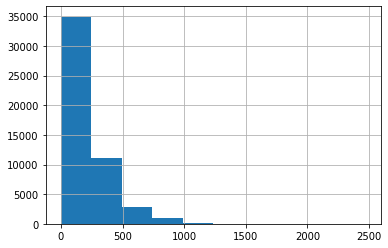

count    50001.000000
mean       230.296154
std        170.666036
min          0.000000
25%        126.000000
50%        172.000000
75%        280.000000
max       2470.000000
dtype: float64

In [10]:
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [11]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]


#Padding/Truncating the data

In [12]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features
seq_length=200
features = pad_features(reviews_int, seq_length)
len_feat = len(features)
print(len_feat)

50000


#Training, Validating, testing dataset Split

In [13]:
split_frac = 0.8
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

#Dataloaders and Batching

In [14]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(np.asarray(train_x)), torch.from_numpy(np.asarray(train_y)))
valid_data = TensorDataset(torch.from_numpy(np.asarray(valid_x)), torch.from_numpy(np.asarray(valid_y)))
test_data = TensorDataset(torch.from_numpy(np.asarray(test_x)), torch.from_numpy(np.asarray(test_y)))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [15]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[     1,  14199,    827,  ...,   6886,    353,     10],
        [     0,      0,      0,  ...,     10, 125317,  76489],
        [   131,     43,    246,  ...,    355,    142,     23],
        ...,
        [     0,      0,      0,  ...,    122,    198,  33589],
        [     1,   1242,   1803,  ...,      6,    125,     28],
        [   796,     19,   1437,  ...,     11,     22,     23]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 1])


#Define the LSTM Network Architecture
1. Embedding Layer: that converts our word tokens (integers) into embedding of specific size
2. LSTM Layer: defined by hidden state dims and number of layers
Fully Connected Layer: that maps output of LSTM layer to a desired output size
3. Sigmoid Activation Layer: that turns all output values in a value between 0 and 1
4. Output: Sigmoid output from the last timestep is considered as the final output of this network

In [16]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

#Training the Network

In [17]:
# Instantiate the model w/ hyperparams
vocab_size = len(word_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


SentimentLSTM(
  (embedding): Embedding(191959, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [19]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


#Training loop

In [23]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        #inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                #inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.577756... Val Loss: 0.652818
Epoch: 1/4... Step: 200... Loss: 0.527442... Val Loss: 0.581401
Epoch: 1/4... Step: 300... Loss: 0.377034... Val Loss: 0.476955
Epoch: 1/4... Step: 400... Loss: 0.515478... Val Loss: 0.501427
Epoch: 1/4... Step: 500... Loss: 0.417854... Val Loss: 0.456940
Epoch: 1/4... Step: 600... Loss: 0.450819... Val Loss: 0.524028
Epoch: 1/4... Step: 700... Loss: 0.551558... Val Loss: 0.428641
Epoch: 1/4... Step: 800... Loss: 0.400869... Val Loss: 0.439015
Epoch: 2/4... Step: 900... Loss: 0.360243... Val Loss: 0.378163
Epoch: 2/4... Step: 1000... Loss: 0.382395... Val Loss: 0.390793
Epoch: 2/4... Step: 1100... Loss: 0.223113... Val Loss: 0.386322
Epoch: 2/4... Step: 1200... Loss: 0.275143... Val Loss: 0.438605
Epoch: 2/4... Step: 1300... Loss: 0.204208... Val Loss: 0.352017
Epoch: 2/4... Step: 1400... Loss: 0.349205... Val Loss: 0.352346
Epoch: 2/4... Step: 1500... Loss: 0.354780... Val Loss: 0.348575
Epoch: 2/4... Step: 1600... Loss: 

#Testing

In [24]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    #inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.349
Test accuracy: 0.875


#Now the LSTM is trained on the data, we can test it on User-generated Data

In [31]:
test_review = 'This movie had the best acting and the dialogue was so good. I loved it.'


In [29]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([word_to_int[word] for word in test_words])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review(test_review)
print(test_ints)


# test sequence padding
seq_length=200
features = pad_features(test_ints, seq_length)

print(features)


# test conversion to tensor and pass into your model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())


def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")

[[10, 17, 66, 1, 116, 111, 2, 1, 406, 13, 37, 49, 8, 414, 9]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  10  17  66   1 116 111   2   1 406  13  37  49   8
  414   9]]
torch.Size([1, 200])


In [30]:
predict(net, test_review, seq_length)

Prediction value, pre-rounding: 0.993761
Positive review detected!
